### K means clustering model

 K-means clustering provides a used tool in financial markets and breaking them down into distinct market regimes.

Purpose: K-means clustering is an unsupervised learning algorithm used for partitioning a dataset into K clusters.


Operation: It assigns data points to clusters based on their similarity to the mean (centroid) of the cluster.


Algorithm: The algorithm iteratively assigns data points to the nearest cluster centroid and updates the centroids until convergence.


Use Case: Commonly used for segmentation, pattern recognition, and data compression.



 K-means clustering is focused on partitioning data into clusters based on similarity, while Gaussian HMM and HMM are probabilistic models specifically designed for handling time series data with hidden states. Gaussian HMM assumes Gaussian distributions for the hidden states, while HMM is more general and can be applied to a broader range of applications.

In [2]:
# import libraries:
#
import datetime
#
from sklearn.cluster import KMeans
#
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import yfinance as yf

Procedure for K-Means clustering model 


Initialization:Randomly select K initial cluster centroids.


Assignment: Assign each data point to the cluster whose centroid is the closest (based on a distance metric, often Euclidean distance).


Update:Recalculate the centroids of each cluster based on the data points assigned to it.
Repeat:



Repeat the assignment and update steps until convergence (when centroids don't change significantly) or a specified number of iterations is reached.

In [3]:

# get asset of interest: SP500 ticker:
asset = '^FTSE'
end_time = datetime.date.today()
# start_time = end_time - datetime.timedelta(days = 11850)
start_time = end_time - datetime.timedelta(days = 1850)
df = yf.download(asset, start=start_time, end=end_time)
df_orig = yf.download(asset, start=start_time, end=end_time)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [4]:
# retrieve additional features:
# FTSE at close prices
ftse = yf.download('^FTSE', start=start_time, end=end_time)
df['^FTSE']=ftse['Close']
# compute ATR technical indicator
df.ta.atr(length=14, append=True)
# compute relative Volume on a rolling basis
df['relative_Vol'] = df['Volume']/df['Volume'].rolling(40).mean()
# get the daily returns of FTSE to perform the regime detection:
df['return'] = df['Close'] - df['Close'].shift(1)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_22229/476616467.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


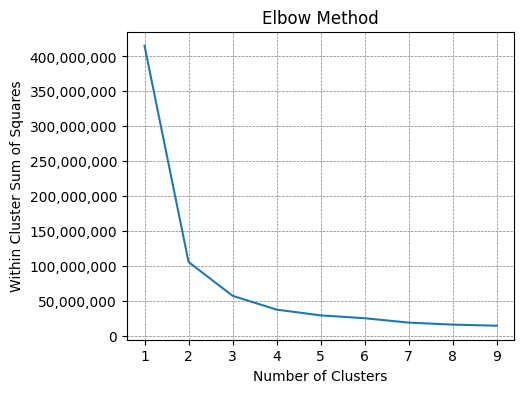

In [9]:
# Elbow method to find optimal number of regimes

df = df[['return', '^FTSE', 'ATRr_14', 'relative_Vol']]

df = df[40:]
df_orig = df_orig[40:]

#within cluster sum of squares:
wcss = []

num_clusters = list(range(1,10))

for i in num_clusters:
    kmeans=KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
fig = plt.figure(figsize =(5, 4))
plt.plot(num_clusters,wcss)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Elbow Method')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 1.0))
plt.ticklabel_format(style='plain')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([round(x) for x in current_values])
plt.show()



In [10]:
# It seems that it is optimal to choose 3 or 4 clusters/regimes so let’s go ahead with 3 clusters.
kmeans_num = 3
kmeans = KMeans(kmeans_num)
df['regime'] = kmeans.fit_predict(df)
df_orig['regime'] = df['regime']
print(df)



               return        ^FTSE    ATRr_14  relative_Vol  regime
Date                                                               
2019-06-12 -30.899902  7367.600098  70.758662      1.146220       2
2019-06-13   1.000000  7368.600098  69.100380      0.874825       2
2019-06-14 -22.800293  7345.799805  67.904744      0.874540       2
2019-06-17  11.500000  7357.299805  66.351108      0.763934       2
2019-06-18  85.700195  7443.000000  70.448431      1.141641       2
...               ...          ...        ...           ...     ...
2024-03-04 -42.200195  7640.299805  59.727015      1.049484       2
2024-03-05   5.900391  7646.200195  59.482214      0.880793       2
2024-03-06  33.099609  7679.299805  59.683471      1.329473       2
2024-03-07  13.200195  7692.500000  60.184631      1.398008       2
2024-03-08 -32.799805  7659.700195  59.292850      0.878987       2

[1198 rows x 5 columns]


In [11]:
print(df_orig)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-06-12  7398.500000  7398.500000  7329.299805  7367.600098  7367.600098   
2019-06-13  7367.600098  7398.600098  7351.000000  7368.600098  7368.600098   
2019-06-14  7368.600098  7368.799805  7316.399902  7345.799805  7345.799805   
2019-06-17  7345.799805  7370.700195  7324.500000  7357.299805  7357.299805   
2019-06-18  7357.299805  7469.200195  7345.600098  7443.000000  7443.000000   
...                 ...          ...          ...          ...          ...   
2024-03-04  7682.500000  7682.600098  7623.200195  7640.299805  7640.299805   
2024-03-05  7640.299805  7654.799805  7598.500000  7646.200195  7646.200195   
2024-03-06  7646.200195  7701.299805  7639.000000  7679.299805  7679.299805   
2024-03-07  7679.299805  7711.799805  7645.100098  7692.500000  7692.500000   
2024-03-08  7692.500000  7693.899902  7646.200195  7

/tmp/ipykernel_22229/740083706.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


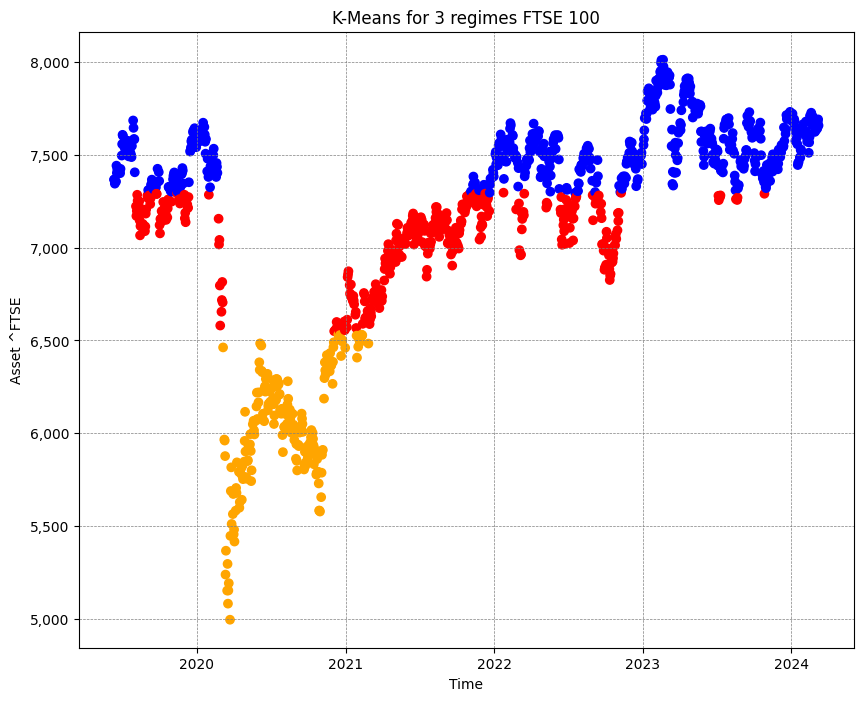

In [13]:
# Plot regimes

colours = []
vcs = {v: i for i, v in enumerate(df_orig.regime.value_counts().index)}
df_orig['freq_rank'] = df_orig.regime.apply(vcs.get)

for i in range(0,len(df_orig)):
    if df_orig['freq_rank'].iloc[i]==0:
        colours.append('blue')
    elif df_orig['freq_rank'].iloc[i]==1:
        colours.append('red')
    elif df_orig['freq_rank'].iloc[i]==2:
        colours.append('orange')
    else:
        colours.append('brown')
        
fig = plt.figure(figsize =(10, 8))
plt.scatter(df_orig.index, df_orig.Close, c=colours)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title(f'K-Means for {kmeans_num} regimes FTSE 100')
plt.ylabel(f'Asset {asset}')
plt.xlabel('Time')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()


### K Means Clustering analysis of Gold 

In [1]:

# import libraries:
#
import datetime
#
from sklearn.cluster import KMeans
#
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import yfinance as yf


In [2]:
# get asset of interest: SP500 ticker:
asset = 'GC=F'
end_time = datetime.date.today()
# start_time = end_time - datetime.timedelta(days = 11850)
start_time = end_time - datetime.timedelta(days = 1850)
df = yf.download(asset, start=start_time, end=end_time)
df_orig = yf.download(asset, start=start_time, end=end_time)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
# retrieve additional features:
# gold at close prices
gold = yf.download('GC=F', start=start_time, end=end_time)
df['GC=F']=gold['Close']
# compute ATR technical indicator
df.ta.atr(length=14, append=True)
# compute relative Volume on a rolling basis
df['relative_Vol'] = df['Volume']/df['Volume'].rolling(40).mean()
# get the daily returns of gold to perform the regime detection:
df['return'] = df['Close'] - df['Close'].shift(1)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_28635/3471506042.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


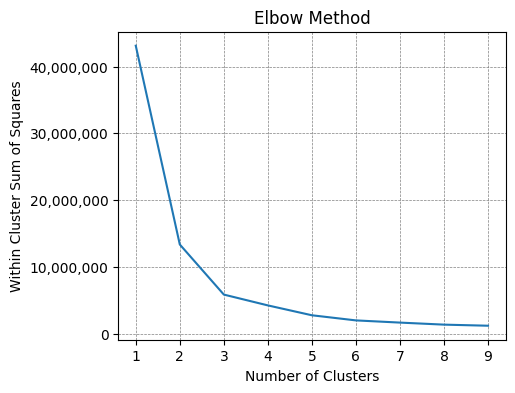

In [4]:

# Elbow method to find optimal number of regimes

df = df[['return', 'GC=F', 'ATRr_14', 'relative_Vol']]

df = df[40:]
df_orig = df_orig[40:]

#within cluster sum of squares:
wcss = []

num_clusters = list(range(1,10))

for i in num_clusters:
    kmeans=KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
fig = plt.figure(figsize =(5, 4))
plt.plot(num_clusters,wcss)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Elbow Method')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 1.0))
plt.ticklabel_format(style='plain')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([round(x) for x in current_values])
plt.show()



In [5]:

kmeans_num = 3
kmeans = KMeans(kmeans_num)
df['regime'] = kmeans.fit_predict(df)
df_orig['regime'] = df['regime']
print(df)



               return         GC=F    ATRr_14  relative_Vol  regime
Date                                                               
2019-04-12   2.000000  1290.599976   9.840073      0.080166       2
2019-04-15  -3.799927  1286.800049   9.724527      0.068997       2
2019-04-16 -14.200073  1272.599976  10.088996      0.084757       2
2019-04-17  -0.400024  1272.199951   9.478865      0.040636       2
2019-04-18  -0.299927  1271.900024   9.034768      0.003567       2
...               ...          ...        ...           ...     ...
2024-03-04  30.800049  2117.699951  19.071643      0.163966       1
2024-03-05  15.800049  2133.500000  19.287962      0.260449       1
2024-03-06  16.800049  2150.300049  19.681682      0.089461       1
2024-03-07   7.699951  2158.000000  19.418705      0.030755       1
2024-03-08  20.600098  2178.600098  20.667362      0.030747       1

[1237 rows x 5 columns]


In [6]:
print(df_orig)



                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-12  1293.400024  1293.400024  1289.199951  1290.599976  1290.599976   
2019-04-15  1284.800049  1287.300049  1282.300049  1286.800049  1286.800049   
2019-04-16  1285.199951  1285.199951  1272.199951  1272.599976  1272.599976   
2019-04-17  1273.500000  1273.500000  1271.599976  1272.199951  1272.199951   
2019-04-18  1270.800049  1273.599976  1270.099976  1271.900024  1271.900024   
...                 ...          ...          ...          ...          ...   
2024-03-04  2083.600098  2119.800049  2080.699951  2117.699951  2117.699951   
2024-03-05  2114.899902  2133.500000  2111.399902  2133.500000  2133.500000   
2024-03-06  2125.500000  2150.300049  2125.500000  2150.300049  2150.300049   
2024-03-07  2147.000000  2163.000000  2147.000000  2158.000000  2158.000000   
2024-03-08  2167.300049  2194.899902  2166.300049  2

/tmp/ipykernel_28635/1140783138.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


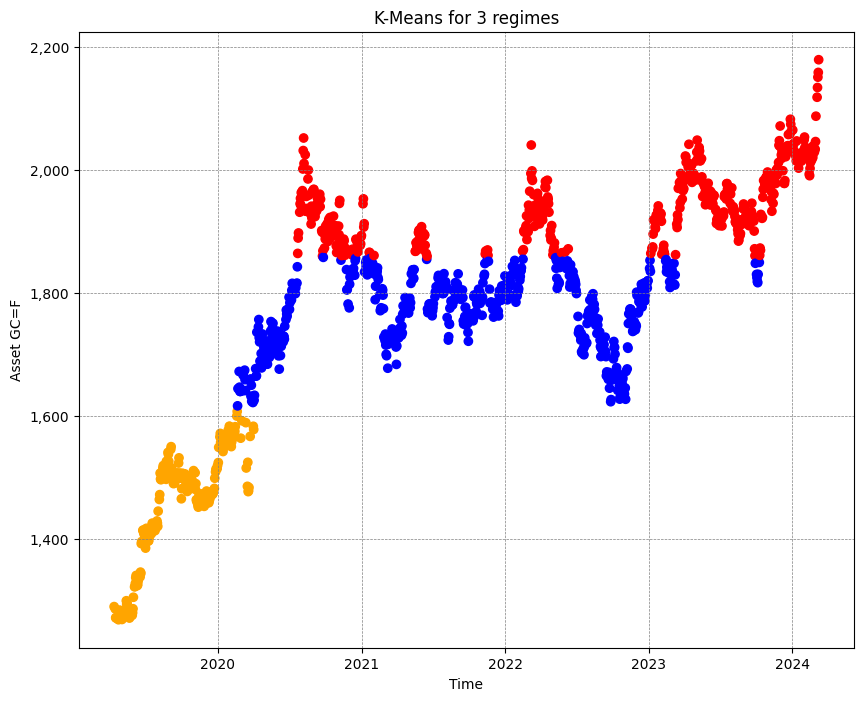

In [7]:
# Plot regimes

colours = []
vcs = {v: i for i, v in enumerate(df_orig.regime.value_counts().index)}
df_orig['freq_rank'] = df_orig.regime.apply(vcs.get)

for i in range(0,len(df_orig)):
    if df_orig['freq_rank'].iloc[i]==0:
        colours.append('blue')
    elif df_orig['freq_rank'].iloc[i]==1:
        colours.append('red')
    elif df_orig['freq_rank'].iloc[i]==2:
        colours.append('orange')
    else:
        colours.append('brown')
        
fig = plt.figure(figsize =(10, 8))
plt.scatter(df_orig.index, df_orig.Close, c=colours)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title(f'K-Means for {kmeans_num} regimes')
plt.ylabel(f'Asset {asset}')
plt.xlabel('Time')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()



### K Means Clustering analysis of Crude Oil 

In [8]:
# import libraries:
#
import datetime
#
from sklearn.cluster import KMeans
#
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import yfinance as yf



In [9]:
# get asset of interest: SP500 ticker:
asset = 'CL=F'
end_time = datetime.date.today()
# start_time = end_time - datetime.timedelta(days = 11850)
start_time = end_time - datetime.timedelta(days = 1850)
df = yf.download(asset, start=start_time, end=end_time)
df_orig = yf.download(asset, start=start_time, end=end_time)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [10]:
# retrieve additional features:
# crude oil at close prices
oil = yf.download('CL=F', start=start_time, end=end_time)
df['CL=F']=oil['Close']
# compute ATR technical indicator
df.ta.atr(length=14, append=True)
# compute relative Volume on a rolling basis
df['relative_Vol'] = df['Volume']/df['Volume'].rolling(40).mean()
# get the daily returns of oil to perform the regime detection:
df['return'] = df['Close'] - df['Close'].shift(1)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_28635/220397933.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


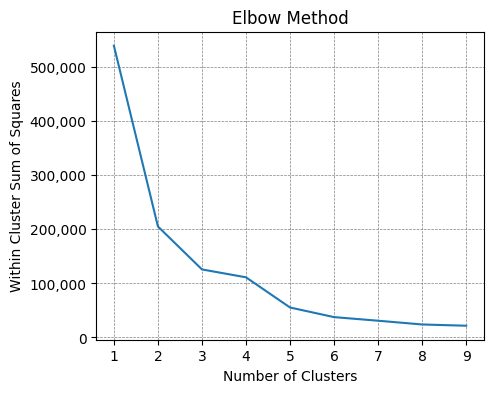

In [11]:

# Elbow method to find optimal number of regimes

df = df[['return', 'CL=F', 'ATRr_14', 'relative_Vol']]

df = df[40:]
df_orig = df_orig[40:]

#within cluster sum of squares:
wcss = []

num_clusters = list(range(1,10))

for i in num_clusters:
    kmeans=KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
fig = plt.figure(figsize =(5, 4))
plt.plot(num_clusters,wcss)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Elbow Method')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 1.0))
plt.ticklabel_format(style='plain')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([round(x) for x in current_values])
plt.show()



In [12]:
kmeans_num = 3
kmeans = KMeans(kmeans_num)
df['regime'] = kmeans.fit_predict(df)
df_orig['regime'] = df['regime']
print(df)


              return       CL=F   ATRr_14  relative_Vol  regime
Date                                                           
2019-04-12  0.309998  63.889999  1.238153      1.014871       2
2019-04-15 -0.489998  63.400002  1.209783      0.891662       2
2019-04-16  0.650002  64.050003  1.222508      0.864554       2
2019-04-17 -0.290005  63.759998  1.202204      0.378421       2
2019-04-18  0.240002  64.000000  1.164902      0.242201       2
...              ...        ...       ...           ...     ...
2024-03-04 -1.230003  78.739998  2.064821      1.087703       1
2024-03-05 -0.589996  78.150002  2.058048      1.362747       1
2024-03-06  0.979996  79.129997  2.102473      1.157667       1
2024-03-07 -0.199997  78.930000  2.060154      1.342321       1
2024-03-08 -0.919998  78.010002  2.086571      1.336181       1

[1237 rows x 5 columns]


In [13]:
print(df_orig)

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2019-04-12  63.709999  64.650002  63.660000  63.889999  63.889999  625588   
2019-04-15  63.759998  63.840000  63.029999  63.400002  63.400002  555858   
2019-04-16  63.570000  64.370003  62.990002  64.050003  64.050003  547469   
2019-04-17  64.320000  64.610001  63.660000  63.759998  63.759998  235376   
2019-04-18  63.750000  64.160004  63.459999  64.000000  64.000000  148238   
...               ...        ...        ...        ...        ...     ...   
2024-03-04  80.139999  80.410004  78.559998  78.739998  78.739998  347214   
2024-03-05  78.739998  79.489998  77.519997  78.150002  78.150002  436521   
2024-03-06  78.150002  80.669998  77.989998  79.129997  79.129997  371049   
2024-03-07  79.129997  79.529999  78.019997  78.930000  78.930000  432923   
2024-03-08  79.510002  79.989998  77.559998  78.010002  78.010002  432923   

/tmp/ipykernel_28635/3469997655.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


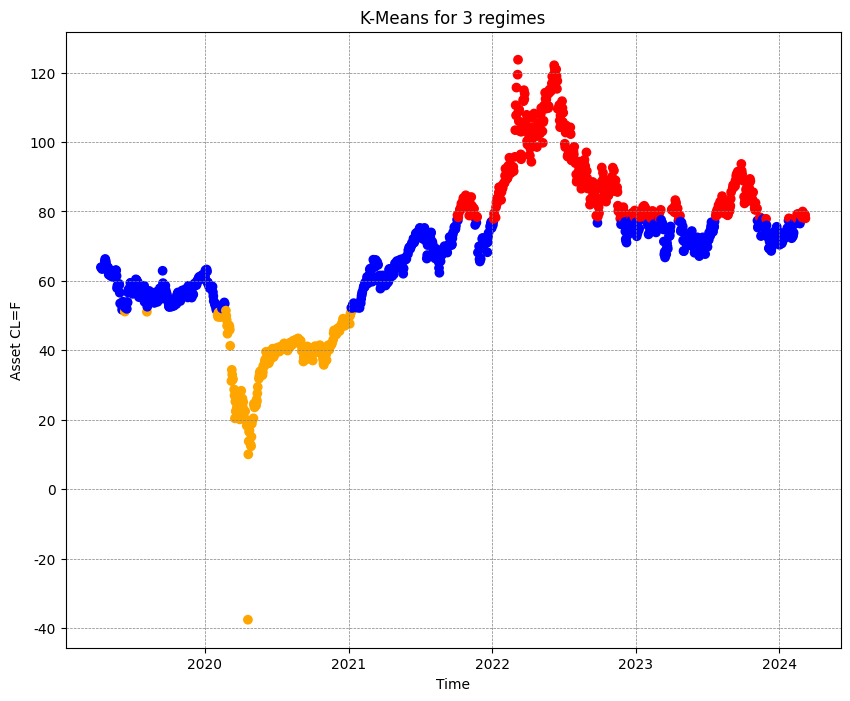

In [14]:

# Plot regimes

colours = []
vcs = {v: i for i, v in enumerate(df_orig.regime.value_counts().index)}
df_orig['freq_rank'] = df_orig.regime.apply(vcs.get)

for i in range(0,len(df_orig)):
    if df_orig['freq_rank'].iloc[i]==0:
        colours.append('blue')
    elif df_orig['freq_rank'].iloc[i]==1:
        colours.append('red')
    elif df_orig['freq_rank'].iloc[i]==2:
        colours.append('orange')
    else:
        colours.append('brown')
        
fig = plt.figure(figsize =(10, 8))
plt.scatter(df_orig.index, df_orig.Close, c=colours)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title(f'K-Means for {kmeans_num} regimes')
plt.ylabel(f'Asset {asset}')
plt.xlabel('Time')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()



### K Means Clustering analysis of Bitcoin-USD 

We can change our analysis by examining 2 regimes instead of 3 as shown below. 

In [15]:
# import libraries:
#
import datetime
#
from sklearn.cluster import KMeans
#
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
import yfinance as yf


In [16]:

# get asset of interest: BTC-USD ticker:
asset = 'BTC-USD'
end_time = datetime.date.today()
# start_time = end_time - datetime.timedelta(days = 11850)
start_time = end_time - datetime.timedelta(days = 1850)
df = yf.download(asset, start=start_time, end=end_time)
df_orig = yf.download(asset, start=start_time, end=end_time)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [17]:
# retrieve additional features:
# BTC-USD at close prices
btc = yf.download('BTC-USD', start=start_time, end=end_time)
df['BTC-USD']=btc['Close']
# compute ATR technical indicator
df.ta.atr(length=14, append=True)
# compute relative Volume on a rolling basis
df['relative_Vol'] = df['Volume']/df['Volume'].rolling(40).mean()
# get the daily returns of SPX500 to perform the regime detection:
df['return'] = df['Close'] - df['Close'].shift(1)


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_28635/1419448105.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


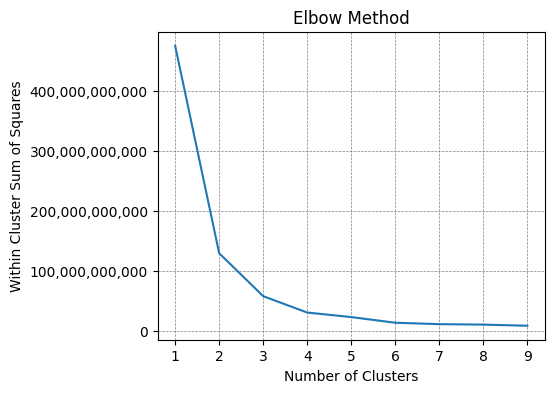

In [18]:

# Elbow method to find optimal number of regimes

df = df[['return', 'BTC-USD', 'ATRr_14', 'relative_Vol']]

df = df[40:]
df_orig = df_orig[40:]

#within cluster sum of squares:
wcss = []

num_clusters = list(range(1,10))

for i in num_clusters:
    kmeans=KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
fig = plt.figure(figsize =(5, 4))
plt.plot(num_clusters,wcss)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Elbow Method')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 1.0))
plt.ticklabel_format(style='plain')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([round(x) for x in current_values])
plt.show()


In [22]:
kmeans_num = 2
kmeans = KMeans(kmeans_num)
df['regime'] = kmeans.fit_predict(df)
df_orig['regime'] = df['regime']
print(df)



                 return       BTC-USD      ATRr_14  relative_Vol  regime
Date                                                                    
2019-03-26    22.010254   3985.080811    67.421385      1.173843       0
2019-03-27   101.985352   4087.066162    70.559912      1.179085       0
2019-03-28   -17.958984   4069.107178    69.369513      1.002831       0
2019-03-29    29.267334   4098.374512    70.117133      1.158542       0
2019-03-30     8.285645   4106.660156    82.950846      1.033183       0
...                 ...           ...          ...           ...     ...
2024-03-04  5163.042969  68330.414062  2321.900908      2.494374       1
2024-03-05 -4529.214844  63801.199219  2859.387617      3.377263       1
2024-03-06  2305.605469  66106.804688  2997.235489      2.181264       1
2024-03-07   818.679688  66925.484375  2952.746570      1.449950       1
2024-03-08  1374.609375  68300.093750  3017.021926      1.769030       1

[1810 rows x 5 columns]


In [23]:
print(df_orig)

                    Open          High           Low         Close  \
Date                                                                 
2019-03-26   3969.228760   3985.080811   3944.753174   3985.080811   
2019-03-27   3984.244873   4087.066162   3977.810547   4087.066162   
2019-03-28   4087.584473   4094.902100   4040.266357   4069.107178   
2019-03-29   4068.299805   4113.500977   4034.097168   4098.374512   
2019-03-30   4092.136230   4296.806641   4053.909668   4106.660156   
...                  ...           ...           ...           ...   
2024-03-04  63137.003906  68537.031250  62386.519531  68330.414062   
2024-03-05  68341.054688  69170.625000  59323.910156  63801.199219   
2024-03-06  63776.050781  67637.929688  62848.671875  66106.804688   
2024-03-07  66099.742188  68029.921875  65655.531250  66925.484375   
2024-03-08  66938.093750  70083.054688  66230.453125  68300.093750   

               Adj Close        Volume  regime  freq_rank  
Date                         

/tmp/ipykernel_28635/1140783138.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


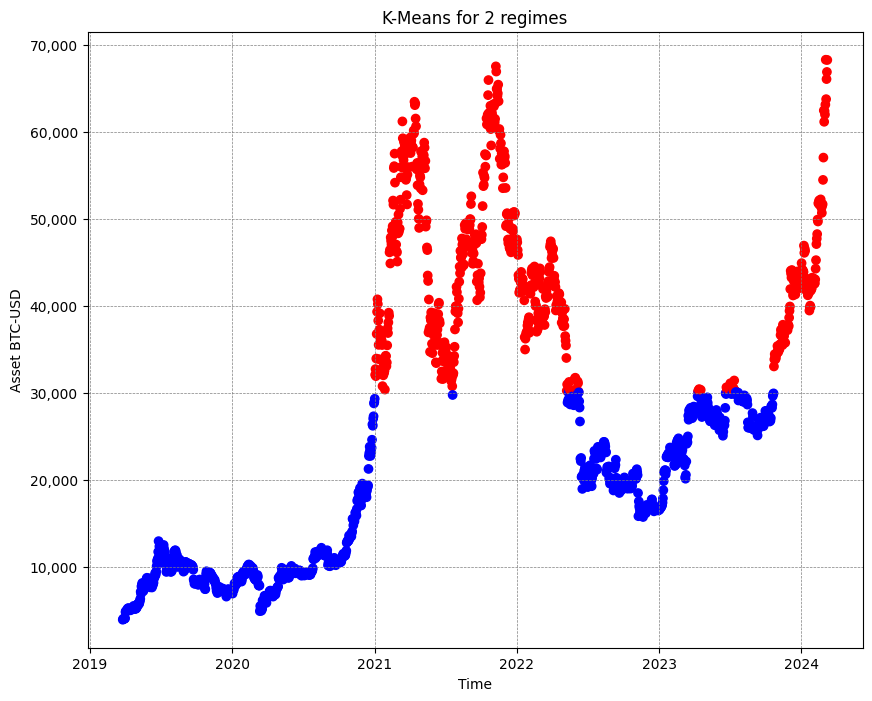

In [24]:
# Plot regimes

colours = []
vcs = {v: i for i, v in enumerate(df_orig.regime.value_counts().index)}
df_orig['freq_rank'] = df_orig.regime.apply(vcs.get)

for i in range(0,len(df_orig)):
    if df_orig['freq_rank'].iloc[i]==0:
        colours.append('blue')
    elif df_orig['freq_rank'].iloc[i]==1:
        colours.append('red')
    elif df_orig['freq_rank'].iloc[i]==2:
        colours.append('orange')
    else:
        colours.append('brown')
        
fig = plt.figure(figsize =(10, 8))
plt.scatter(df_orig.index, df_orig.Close, c=colours)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title(f'K-Means for {kmeans_num} regimes')
plt.ylabel(f'Asset {asset}')
plt.xlabel('Time')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

